<a href="https://colab.research.google.com/github/duckieeloaded/apartmentforrent/blob/main/ChuanDoanBenhTieuDuongvaGiaPhongTro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Khai báo thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [ ]:
#Đọc dữ liệu
url = "https://raw.githubusercontent.com/thangnch/MIAI_DecisionTree/refs/heads/main/data.csv"
df = pd.read_csv(url)
print("Dữ liệu:")
#Xem 5 dòng đầu
df.head()

Dữ liệu:


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [ ]:
#Xem 5 dòng cuối
df.tail()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
111,45,26.85,92,3.33,0.755688,54.68,12.10,10.96,268.23,2
112,62,26.84,100,4.53,1.117400,12.45,21.42,7.32,330.16,2
113,65,32.05,97,5.73,1.370998,61.48,22.54,10.33,314.05,2
114,72,25.59,82,2.82,0.570392,24.96,33.75,3.27,392.46,2
115,86,27.18,138,19.91,6.777364,90.28,14.11,4.35,90.09,2


In [ ]:
print('Số lượng mẫu của bộ dữ liệu là:', df.shape[0])
print('Số lượng thuộc tính của bộ dữ liệu là:', df.shape[1])

Số lượng mẫu của bộ dữ liệu là: 116
Số lượng thuộc tính của bộ dữ liệu là: 10


In [344]:
#Kiểm tra giá trị khuyết thiếu
df.isnull().sum()


,0
Age,0
BMI,0
Glucose,0
Insulin,0
HOMA,0
Leptin,0
Adiponectin,0
Resistin,0
MCP.1,0
Classification,0


In [348]:
df_filled = df.fillna(df.mean())
df[df.duplicated()]
drop_df = df.dropna()
print(drop_df)
#Kiểm tra khuyết thuyết và trùng lặp

     Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0     48  23.500000       70    2.707  0.467409   8.8071     9.702400   
1     83  20.690495       92    3.115  0.706897   8.8438     5.429285   
2     82  23.124670       91    4.498  1.009651  17.9393    22.432040   
3     68  21.367521       77    3.226  0.612725   9.8827     7.169560   
4     86  21.111111       92    3.549  0.805386   6.6994     4.819240   
..   ...        ...      ...      ...       ...      ...          ...   
111   45  26.850000       92    3.330  0.755688  54.6800    12.100000   
112   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
113   65  32.050000       97    5.730  1.370998  61.4800    22.540000   
114   72  25.590000       82    2.820  0.570392  24.9600    33.750000   
115   86  27.180000      138   19.910  6.777364  90.2800    14.110000   

     Resistin    MCP.1  Classification  
0     7.99585  417.114               1  
1     4.06405  468.786               1  


In [ ]:
#Xem class
#1. Bị bệnh tiểu đường
#2. Không bị bệnh tiểu đường
print('Có bị bệnh hay không')
df['Classification'].value_counts()


Có bị bệnh hay không


,count
Classification,
2,64
1,52


In [ ]:
y = df['Classification'].values.reshape(-1,1)

x = df.drop(columns=['Classification'])

In [ ]:
print(x.shape)
print(y.shape)

(116, 9)
(116, 1)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

my_tree = DecisionTreeClassifier()
my_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = my_tree.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

print(cm)


[[6 3]
 [0 3]]


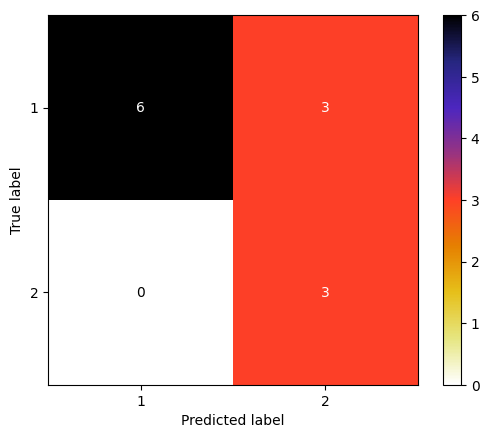

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=my_tree.classes_)
disp.plot(cmap=plt.cm.CMRmap_r)
plt.show()
#Dự đoán mắc bệnh tiểu đường

In [357]:
#Cây quyết định về dự đoán Phòng trọ hợp cho sinh viên
url = "https://raw.githubusercontent.com/duckieeloaded/apartmentforrent/refs/heads/main/dataAFR1.csv"
data = pd.read_csv(url)
data.head()

,DangPhong,Gia,LoiNhuan
0,'Phòng Duplex',6000,1500
1,'Phòng Studio',5000,1000
2,'Phòng dạng 1pn',7000,2000
3,'Phòng dạng 2pn',12000,5000
4,'Chung cư mini',8000,3000


In [ ]:
#Tạo dữ liệu

x= data['Gia'].values.reshape(-1,1)
y= data['LoiNhuan'].values.reshape(-1,1)

In [ ]:
my_tree = DecisionTreeRegressor()
my_tree.fit(x,y)

DecisionTreeRegressor()

In [ ]:
x_test = [[12000]]

y_pred = my_tree.predict(x_test)
print(y_pred)

[5000.]


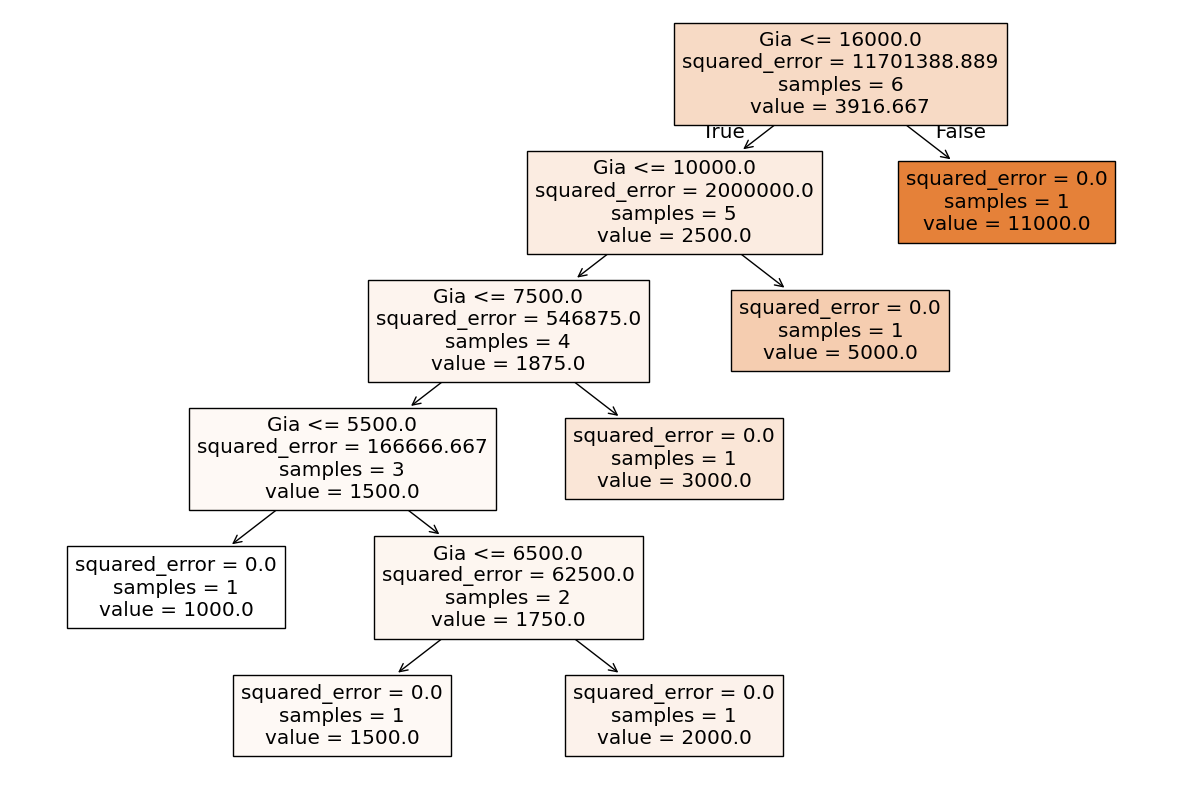

In [ ]:
fig = plt.figure(figsize=(15,10))
_=tree.plot_tree(my_tree, feature_names=['Gia'], class_names=['LoiNhuan'], filled=True)